In [1]:
from __future__ import print_function, division
import thinkdsp
import thinkplot
import numpy 

%matplotlib inline

In [2]:
cosine_signal = thinkdsp.CosSignal(freq=550)

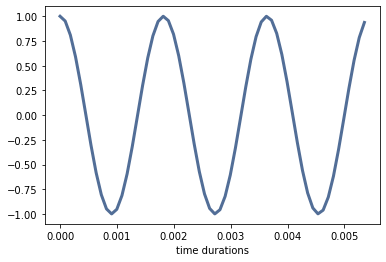

In [3]:
cosine_signal.plot()
thinkplot.config(xlabel='time durations', legend=False)

In [4]:
wave = cosine_signal.make_wave(duration=0.8,framerate=12136)

In [5]:
wave.apodize()
wave.make_audio()

In [6]:
spectrum = wave.make_spectrum()

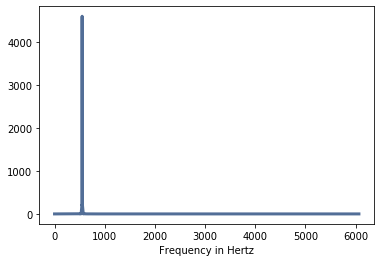

In [7]:
spectrum.plot()
thinkplot.config(xlabel='Frequency in Hertz',legend=False)

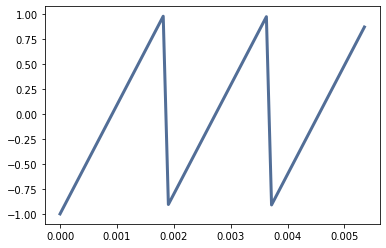

In [8]:
Saw_Tooth_Signal= thinkdsp.SawtoothSignal(freq=550)
Saw_Tooth_Signal.plot()

In [9]:
saw_wave = Saw_Tooth_Signal.make_wave(duration=0.8)
saw_wave.make_audio()

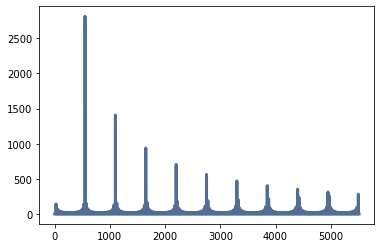

In [10]:
saw_wave.make_spectrum().plot()

In [11]:
moviesongcall = thinkdsp.read_wave('music.wav')
moviesongcall.make_audio()

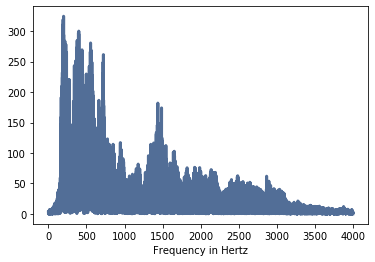

In [12]:
spectrum = moviesongcall.make_spectrum()

spectrum.plot()
thinkplot.config(xlabel='Frequency in Hertz',legend=False)

In [13]:
start = 1.2
duration = 0.8
segment = moviesongcall.segment(start,duration)

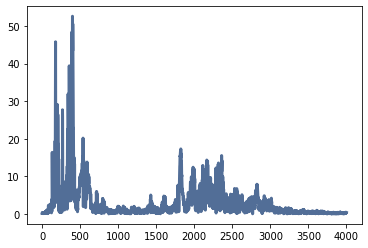

In [14]:
spectrum = segment.make_spectrum()
spectrum.plot()

In [15]:
spectrum.peaks()[:5]

[(52.60920700325788, 400.0),
 (50.57719764123047, 403.75),
 (48.46775046665708, 393.75),
 (47.120444076509365, 398.75),
 (46.70816582132269, 405.0)]

In [16]:
import math
PI6 = 2*math.pi

class SawtoothChirp(thinkdsp.Chirp):    
    
    def evaluate(self,ts):
        '''Helper function that evaluates the signal.
        
        ts: float array of times
        freqs: float array of frequencies during each interval'''
        
        dts = numpy.diff(ts)
        start,end = numpy.log10(self.start),numpy.log10(self.end)
        freqs = numpy.logspace(start,end,len(ts)-1)
        dps = PI6*freqs*dts
        phases = numpy.cumsum(dps)
        phases = numpy.insert(phases,0,0)
        cycles = phases/PI6
        frac,_ = numpy.modf(cycles)
        ys = thinkdsp.normalize(thinkdsp.unbias(frac),self.amp)
        return ys
    

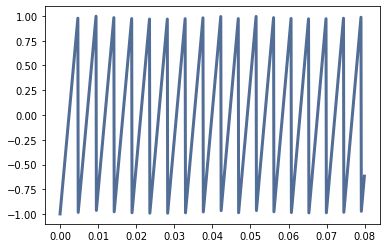

In [17]:
signal = SawtoothChirp(start=211,end=891)
wave = signal.make_wave(duration=3,framerate=11111)
segment = wave.segment(duration=0.08)
segment.plot()

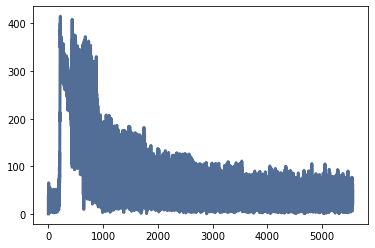

In [18]:
spectrum = wave.make_spectrum()
spectrum.plot()


In [19]:
wave.apodize()
wave.make_audio()

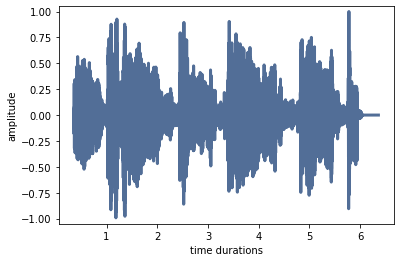

In [20]:
response = thinkdsp.read_wave('music1.wav')
response = response.segment(start=0.36,duration=6.0)
response.normalize()
response.plot()
thinkplot.config(xlabel='time durations', ylabel='amplitude',ylim=[-1.05,1.05],legend=False)

In [21]:
response.make_audio()